# Kolomogrov Smirnov(K-S) Chart

* This is one of the Metrics used to measure the performance of model, in other words it measures the **degrese of separation between positive and negative distributions**.

In [1]:
#import the packages which are used
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#import the data set

data_set = pd.read_csv(".\Data Sets\PDS.csv")

data_set.head()

,Pregnencies,Plasma,Diastolic,Triceps,Serum,BMI,Pedigree,Age,Diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#create Features and Response from data set
mat_data = data_set[:].as_matrix()

#Feature Matrix
x = mat_data[:,0:8]

#response
y = mat_data[:,8].astype('int')

#print shape of both feature and response
print(x.shape,y.shape)

(768, 8) (768,)


In [4]:
#split the data into test and train

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=32,test_size=.3)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(537, 8) (231, 8) (537,) (231,)


In [5]:
#instantiate the Logistic regression model
logreg = LogisticRegression()

#fit the train model
logreg.fit(xtrain,ytrain)

proba = logreg.predict_proba(xtest)

print("True Negative\tTrue Postivie\n",proba)

True Negative	True Postivie
 [[ 0.54655121  0.45344879]
 [ 0.76367739  0.23632261]
 [ 0.40477585  0.59522415]
 [ 0.82510888  0.17489112]
 [ 0.64758299  0.35241701]
 [ 0.87055848  0.12944152]
 [ 0.62042085  0.37957915]
 [ 0.42556282  0.57443718]
 [ 0.27756568  0.72243432]
 [ 0.89371163  0.10628837]
 [ 0.69992569  0.30007431]
 [ 0.80918568  0.19081432]
 [ 0.85305573  0.14694427]
 [ 0.92391988  0.07608012]
 [ 0.86221385  0.13778615]
 [ 0.82466308  0.17533692]
 [ 0.50057277  0.49942723]
 [ 0.86644792  0.13355208]
 [ 0.43499159  0.56500841]
 [ 0.62716292  0.37283708]
 [ 0.63921594  0.36078406]
 [ 0.62350473  0.37649527]
 [ 0.72304944  0.27695056]
 [ 0.54778237  0.45221763]
 [ 0.74188794  0.25811206]
 [ 0.85314807  0.14685193]
 [ 0.20804952  0.79195048]
 [ 0.88867678  0.11132322]
 [ 0.85535457  0.14464543]
 [ 0.82133104  0.17866896]
 [ 0.47657811  0.52342189]
 [ 0.47234091  0.52765909]
 [ 0.7449234   0.2550766 ]
 [ 0.67549817  0.32450183]
 [ 0.5345983   0.4654017 ]
 [ 0.76030301  0.23969699]

In [6]:
TP_prob = proba[:,1]
pos = pd.get_dummies(ytest).as_matrix()[:,1]
pos_index = np.argsort(TP_prob)[::-1]
sorted_pos = pos[pos_index]
#no of instance in the ytest
n = ytest.shape[0]

#Base Rate
Base_rate = np.arange(1,n+1)

#Base_rate percentage
Base_rate= Base_rate/n


In [7]:
df = pd.DataFrame(TP_prob[pos_index],columns=['TP'])
decile_df=pd.DataFrame()
df['sorted'] = np.array(sorted_pos)
df['decile'] = (df['TP'].argsort()/float(len(df))*10).astype('int')
df['Base_rate'] = Base_rate
index = df.groupby(df.decile).mean().index
base = (df.Base_rate.groupby(df.decile).mean()*100)[::-1].reset_index()
decile_values = df.groupby([df.decile,df.sorted]).count()
df.head()
decile_df['Good'] = decile_values['TP'][:,0]
decile_df['Bad'] = decile_values['TP'][:,1]
decile_df = decile_df.fillna(0)



In [8]:
decile_df['Recall'] = decile_df.Good/sum(decile_df.Good)*100
decile_df['Specificty'] = decile_df.Bad/sum(decile_df.Bad)*100

decile_df['Cum_Good'] = np.cumsum(decile_df.Recall)
decile_df['Cum_Bad'] = np.cumsum(decile_df.Specificty)

decile_df['K-S'] = abs(decile_df.Cum_Good - decile_df.Cum_Bad)

decile_df

,Good,Bad,Recall,Specificty,Cum_Good,Cum_Bad,K-S
decile,,,,,,,
0,24,0.0,16.326531,0.000000,16.326531,0.000000,16.326531
1,23,0.0,15.646259,0.000000,31.972789,0.000000,31.972789
2,20,3.0,13.605442,3.571429,45.578231,3.571429,42.006803
3,15,8.0,10.204082,9.523810,55.782313,13.095238,42.687075
4,17,6.0,11.564626,7.142857,67.346939,20.238095,47.108844
5,15,8.0,10.204082,9.523810,77.551020,29.761905,47.789116
6,13,10.0,8.843537,11.904762,86.394558,41.666667,44.727891
7,10,13.0,6.802721,15.476190,93.197279,57.142857,36.054422
8,7,16.0,4.761905,19.047619,97.959184,76.190476,21.768707


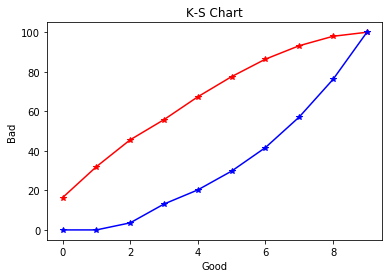

In [9]:
# K-S Chart plot

plt.title("K-S Chart")
plt.xlabel("Good")
plt.ylabel("Bad")

#tricks to represent the diagonal
#plt.plot(marker='.',color='blue')
#gains curve
plt.plot(decile_df.Cum_Good,'r-*')
plt.plot(decile_df.Cum_Bad,'b-*')
#show the chart
plt.show()

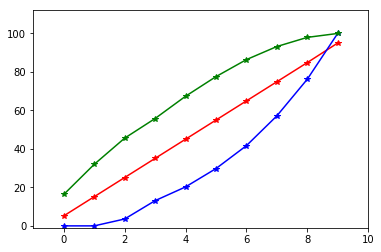

In [10]:
plt.title("K-S Chart")
plt.xlabel("Good")
plt.ylabel("Bad")

plt.xlim(-1,10)
plt.ylim(-1,112)
plt.plot(base.Base_rate,'r-*')
plt.plot(decile_df.Cum_Bad,'b-*')
plt.plot(decile_df.Cum_Good,'g-*')
#show the chart
plt.show()